# Ejercicio 01

**1. ¿En qué se diferencian los algoritmos de optimización genéticos y los de enjambre de partículas?**

Los algoritmos genéticos (GA) y los de enjambre de partículas (PSO) son técnicas de optimización, pero se diferencian en su enfoque. GA se inspira en la evolución natural y usa operadores como selección, cruce y mutación en una población de soluciones discretas. PSO, basado en el comportamiento social de enjambres, mueve partículas en un espacio continuo ajustando sus velocidades según su experiencia y la del enjambre. Mientras GA evoluciona generaciones de soluciones, PSO coordina el movimiento cooperativo de partículas hacia la mejor solución.

**2. ¿En qué parte de los algoritmos de enjambre de partículas se considera la “exploración” y “explotación”?**

En los algoritmos de enjambre de partículas (PSO), la "exploración" se realiza mediante el componente aleatorio y la influencia del mejor global (global best), permitiendo a las partículas buscar nuevas áreas del espacio de búsqueda. La "explotación" se logra mediante el componente de la mejor posición personal (personal best) de cada partícula, haciendo que las partículas se concentren alrededor de las mejores soluciones encontradas. Esto equilibra la búsqueda de nuevas soluciones y la mejora de las existentes.

**3. ¿Se pueden paralelizar los algoritmos de enjambre de partículas?**

Sí, los algoritmos de enjambre de partículas (PSO) se pueden paralelizar. Esto, dado que la actualización de la posición y la velocidad de cada partícula es independiente de las demás. Es decir, estas operaciones se pueden realizar simultáneamente en múltiples procesadores o núcleos. 

# Ejercicio 2

Instrucciones:

Mediante el uso de algoritmos de enjambre de partículas, resuelva el siguiente ejercicio.
Implemente un algoritmo de optimización de enjambre de partículas (PSO) para encontrar el mínimo de la función

𝑓(𝑥, 𝑦) = (𝑥 − 3) ** 2 + (𝑦 − 2) ** 2

Para ello considere lo siguiente::
1. Inicialice el enjambre con N = 40 partículas
2. Cada posición de partículas estará dentro del rango [-10, 10] tanto para x como y.
3. La velocidad deberá estar en el rango [-1, 1]
4. Establezca la mejor posición personal inicial de cada partícula en su posición inicial y la mejor posición global en la mejor posición inicial de partícula.
5. Para cada partícula:

    a. Actualice su velocidad según lo visto en clase

    b. Actualice su posición según lo visto en clase

6. Use inicialmente w=0.5, c1 = 1.5, c2 = 1.5
7. r1 y r2 son valores aleatorios entre 0 y 1 (recuerde usar seed)
8. Actualice la mejor posición personal si la nueva posición tiene un valor de función más bajo que la mejor posición personal anterior,
9. Actualice la mejor posición global si la nueva posición tiene un valor de función más bajo que la mejor posición global anterior.
10. Repita este proceso a lo sumo 100 veces o hasta que el cambio en el global sea menor a un threshold definido por usted.
Recuerde graficar el contour plot de la función y mostrar la evolución de las partículas sobre este. Es decir, deberá mostrar al menos 3 gráficas del inicio, algún punto medio y el final de su iteración para encontrar la solución. Nota, la solución para esta función está en (3,2).

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# funcion objetivo
def objective_function(x, y):
    return (x - 3) ** 2 + (y - 2) ** 2

In [29]:
# Parámetros del PSO
N = 40
xmin, xmax = -10, 10 # posiciones
ymin, ymax = -1, 1 # velocidades

w = 0.5
c1, c2 = 1.5, 1.5

max_iter = 100
threshold = 1e-4

# semilla
np.random.seed(42)

# Inicialización
positions = np.random.uniform(xmin, xmax, (N, 2))
velocities = np.random.uniform(ymin, ymax, (N, 2))

In [30]:
print(f"tamaño de positions: {len(positions)}")
print(f"tamaño de velocities: {len(velocities)}")

tamaño de positions: 40
tamaño de velocities: 40


In [31]:
# mejor posicion

pbpositions = np.copy(positions)
pbvalues = objective_function(pbpositions[:, 0], pbpositions[:, 1])

print(f"tamaño de pbpositions: {len(pbpositions)}")
print(f"tamaño de pbvalues: {len(pbvalues)}")

tamaño de pbpositions: 40
tamaño de pbvalues: 40


In [32]:
gbposition = pbpositions[np.argmin(pbvalues)]
gbvalue = np.min(pbvalues)

print(f"tamaño de gbposition: {len(gbposition)}")
print(f"valores en gbposition: {gbposition}")
print(f"valor de gbvalue: {(gbvalue)}")

tamaño de gbposition: 2
valores en gbposition: [4.63987884 1.97316968]
valor de gbvalue: 2.6899224633686725


In [33]:
# definición de función para actualizar velocidades y posiciones

def update_vel(position, velocity, pbest, gbest, w=w, c1=c1, c2=c2):
    r1, r2 = np.random.rand(2)
    new_vel = (w * velocity +
               c1 * r1 * (pbest - position) +
               c2 * r2 * (gbest - position))
    return new_vel

def update_pos(position, velocity):
    new_pos = position + velocity
    return new_pos

In [34]:
# almacenar posiciones para graficar
hpos=[np.copy(positions)]

In [35]:
# Algoritmo PSO
for iteration in range(max_iter):
    for i in range(N):

        # actualizamos la velocidad y la posicion
        velocities[i] = update_vel(positions[i], velocities[i], pbpositions[i], gbposition)
        positions[i] = update_pos(positions[i], velocities[i])

        # confinamos las posiciones y velocidades
        positions[i] = np.clip(positions[i], xmin, xmax)
        velocities[i] = np.clip(velocities[i], ymin, ymax)

        # evaluamos nueva posicion 
        value = objective_function(positions[i][0], positions[i][1])

        # actualizamos mejor posicion
        if value < pbvalues[i]:
            pbpositions[i] = positions[i]
            pbvalues[i] = value

    # actualizamos mejor global

    min_pbvalues = np.min(pbvalues)
    if min_pbvalues < gbvalue:
        gbvalue = min_pbvalues
        gbposition = pbpositions[np.argmin(pbvalues)]

    hpos.append(np.copy(positions))

    # verificamos el umbral
    if np.abs(gbvalue - min_pbvalues) < threshold:
        break
    print(f"Iteración {iteration}, mejor valor: {gbvalue}")

In [36]:
# Algoritmo PSO
gbvalue_prev = gbvalue  # Inicializar con el valor inicial de gbvalue
for iteration in range(max_iter):
    for i in range(N):

        # actualizamos la velocidad y la posicion
        velocities[i] = update_vel(positions[i], velocities[i], pbpositions[i], gbposition)
        positions[i] = update_pos(positions[i], velocities[i])

        # confinamos las posiciones y velocidades
        positions[i] = np.clip(positions[i], xmin, xmax)
        velocities[i] = np.clip(velocities[i], ymin, ymax)

        # evaluamos nueva posicion 
        value = objective_function(positions[i][0], positions[i][1])

        # actualizamos mejor posicion
        if value < pbvalues[i]:
            pbpositions[i] = positions[i]
            pbvalues[i] = value

    # actualizamos mejor global
    min_pbvalues = np.min(pbvalues)
    if min_pbvalues < gbvalue:
        gbposition = pbpositions[np.argmin(pbvalues)]
        gbvalue_prev = gbvalue  # Guardamos el valor anterior de gbvalue
        gbvalue = min_pbvalues

    hpos.append(np.copy(positions))

    # verificamos el umbral antes de actualizar gbvalue
    if np.abs(gbvalue_prev - gbvalue) < threshold:
        print(f"Convergencia alcanzada en iteración {iteration}, mejor valor: {gbvalue}")
        break
    print(f"Iteración {iteration}, mejor valor: {gbvalue}")

Iteración 0, mejor valor: 0.027921704030879773
Iteración 1, mejor valor: 0.007844851447126747
Iteración 2, mejor valor: 0.007844851447126747
Iteración 3, mejor valor: 0.0023523105039185126
Iteración 4, mejor valor: 0.001083198319551097
Iteración 5, mejor valor: 0.001083198319551097
Iteración 6, mejor valor: 0.0006821253103470112
Iteración 7, mejor valor: 0.0006821253103470112
Iteración 8, mejor valor: 0.00015489169028085628
Iteración 9, mejor valor: 1.374956247243409e-05
Convergencia alcanzada en iteración 10, mejor valor: 2.019546536539078e-06


In [37]:
# Algoritmo PSO
gbvalue_prev = gbvalue  # Inicializar con el valor inicial de gbvalue
for iteration in range(max_iter):
    for i in range(N):

        # actualizamos la velocidad y la posicion
        velocities[i] = update_vel(positions[i], velocities[i], pbpositions[i], gbposition)
        positions[i] = update_pos(positions[i], velocities[i])

        # confinamos las posiciones y velocidades
        positions[i] = np.clip(positions[i], xmin, xmax)
        velocities[i] = np.clip(velocities[i], ymin, ymax)

        # evaluamos nueva posicion 
        value = objective_function(positions[i][0], positions[i][1])

        # actualizamos mejor posicion
        if value < pbvalues[i]:
            pbpositions[i] = positions[i]
            pbvalues[i] = value

    # actualizamos mejor global
    min_pbvalues = np.min(pbvalues)
    if min_pbvalues < gbvalue:
        gbposition = pbpositions[np.argmin(pbvalues)]
        gbvalue_prev = gbvalue  # Guardamos el valor anterior de gbvalue
        gbvalue = min_pbvalues

    hpos.append(np.copy(positions))

    # verificamos el umbral antes de actualizar gbvalue
    if np.abs(gbvalue_prev - gbvalue) < threshold:
        print(f"Convergencia alcanzada en iteración {iteration}, mejor valor: {gbvalue}")
        break
    print(f"Iteración {iteration}, mejor valor: {gbvalue}")

Convergencia alcanzada en iteración 0, mejor valor: 3.142885480528105e-07


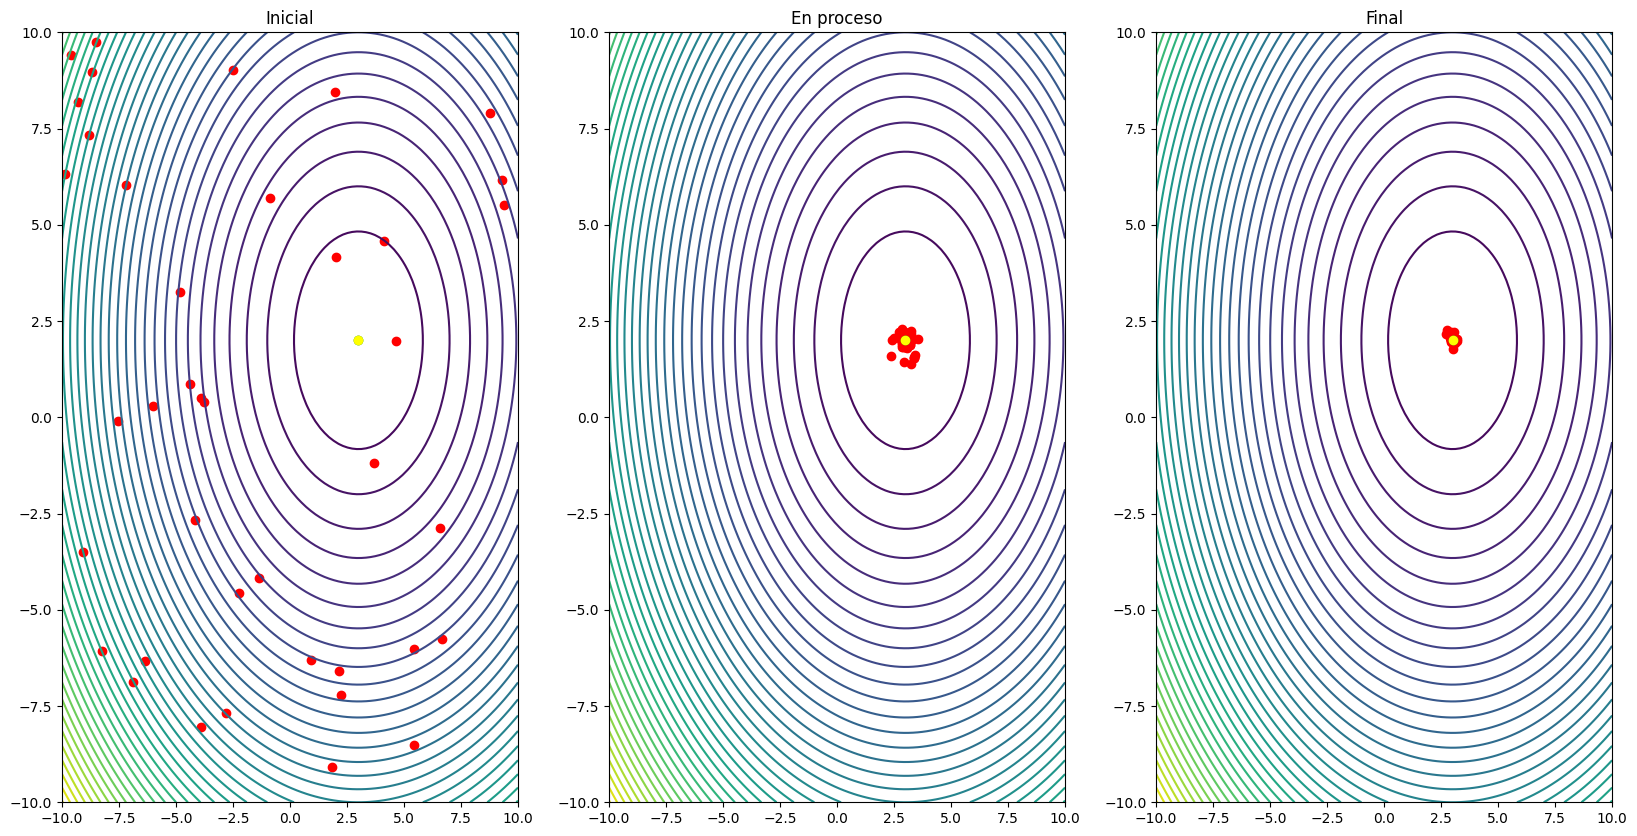

In [38]:
# graficamos
x = np.linspace(xmin, xmax, 100)
y = np.linspace(xmin, xmax, 100)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

for ax, positions, title in zip(axs, [hpos[0], hpos[len(hpos)//2], hpos[-1]], ["Inicial", "En proceso", "Final"]):
    Z = objective_function(X, Y)
    ax.contour(X, Y, Z, 50)
    ax.scatter(positions[:, 0], positions[:, 1], color='red')
    ax.scatter(gbposition[0], gbposition[1], color='green')
    ax.scatter(3, 2, color='yellow')  # Punto en (3, 2)

    ax.set_title(title)

In [39]:
gbposition

array([3.00039794, 2.00039488])

In [40]:
hpos[-1]

array([[3.04314729, 1.96492852],
       [2.8984493 , 2.05059083],
       [3.02943775, 2.05088805],
       [3.09088479, 1.92649627],
       [3.06435612, 2.07060874],
       [3.00024642, 1.9926699 ],
       [2.75205486, 2.26014185],
       [3.00211047, 1.98943379],
       [2.92824071, 2.21566077],
       [2.99597737, 2.00495841],
       [3.02108382, 2.04305396],
       [2.97088077, 1.97696858],
       [2.98745878, 1.99798991],
       [2.92799732, 1.99021124],
       [3.05609221, 2.21079901],
       [3.01410703, 2.03558017],
       [3.00075293, 1.77094153],
       [3.04810976, 1.97281352],
       [2.91401702, 1.95480112],
       [3.19169949, 1.98014332],
       [2.9974655 , 1.98491331],
       [2.95425229, 2.02849089],
       [3.07129985, 1.9762561 ],
       [2.99519121, 2.00478341],
       [2.93420461, 2.00111113],
       [2.94621023, 1.99965377],
       [2.95882093, 1.96624037],
       [2.72168059, 2.1627101 ],
       [2.99408707, 1.94360834],
       [3.06873902, 2.0422738 ],
       [3.

# Ejercicio 3

Usando el ejercicio anterior, pruebe cambiar los valores de w, c1, y c2 con nuevos valores que ustedes definan.
Deben probar al menos 3 sets diferentes a los datos y sobre estos evaluar
- Cambió el resultado?
- ¿Cuántas iteraciones tomó?

Recuerde graficar el contour plot de la función.

In [41]:
# Parámetros del PSO
N = 40
xmin, xmax = -10, 10 # posiciones
ymin, ymax = -1, 1 # velocidades
max_iter = 100
threshold = 1e-4
np.random.seed(42)